---
#### Poisson's differential equation
$$
    \nabla^2 f(x,y) = g(x,y) \\ \; \\
    \implies \nabla \cdot \nabla f = g \\ \; \\
    \implies \langle \frac{\partial}{\partial x}, \frac{\partial}{\partial y}\rangle \cdot \langle \frac{\partial f}{\partial x}, \frac{\partial f}{\partial y}\rangle = g \\ \; \\
    \implies f_{xx} + f_{yy} = g
$$

---

##### Discrete approximation

$$
    f_x = \lim_{h \rightarrow 0} \frac{f(x+h,y) - f(x-h,y)}{2h} \\ \; \\
    f_{xx} = \lim_{h \rightarrow 0} \frac{f_x(x+h,y) - f_x(x-h,y)}{2h} \\ \; \\
    f_{xx} = \lim_{h \rightarrow 0} \frac{1}{2h} \times \bigg\{ \frac{f(x+h+h,y) - f(x+h - h,y)}{2h} - \frac{f(x-h+h,y)-f(x-h-h,y)}{2h} \bigg\} \\ \; \\
    f_{xx} = \lim_{h \rightarrow 0} \frac{1}{4h^2} \times \bigg\{ f(x+2h,y) - f(x,y) - f(x,y) + f(x-2h,y) \bigg\} \\ \; \\
    f_{xx} = \lim_{h \rightarrow 0} \frac{1}{4h^2} \times \bigg\{ f(x+2h,y) + f(x-2h,y) - 2f(x,y) \bigg\} \\ \; \\
$$


Similarly, 
$$
    f_{yy} = \lim_{h \rightarrow 0} \frac{1}{4h^2} \times \bigg\{ f(x,y+2h) + f(x,y-2h) - 2f(x,y) \bigg\} \\ \; \\
$$

---

Hence, for sufficiently small $h$, the discrete/difference Poission equation is given by,

$$
    f_{xx} + f_{yy} = g \\ \; \\ 
    \implies f(x+2h,y) + f(x-2h,y) + f(x,y+2h) + f(x,y-2h) - 4f(x,y) = 4h^2 g(x,y)
$$

---
Setting $h$ to $\frac{h}{2}$, we get,

$$
    \implies f(x+h,y) + f(x-h,y) + f(x,y+h) + f(x,y-h) - 4f(x,y) = h^2 g(x,y) \\ \; \\
      or \; f(x,y) = h^2 g(x,y) - (f_{top} + f_{bottom} + f_{right} + f_{left})   
$$




$$
        \;\;\; f_{top} \\ \; \\
        f_{left} \;\;\;\;\; f(x,y) \;\;\;\;\; f_{right} \\ \; \\
        \;\;\; f_{bottom}
$$


---
---
In addition to the Poission equation, we are also given the boundary values on a rectangle with $p \leq x \leq q$ and $r \leq y \leq s$.

On the boundary of the rectangular region, we have the values given by $b(x,y)$.

Since the matrix representing the above difference equation is 

Since solving the equation on a fine grid is computationally heavy, we will first start with a coarse grid and an initial solution estimate set to b(x,y) over the grid and try to solve the difference equation above. Then we will refine our grid and intrapolate the solution from the previous step that was obtained with low computational complexity as our initial estimate and then resolve on the finer grid and hopefully we will get faster convergence since we started with a good estimate.

---
---

In [41]:
import numpy as np
import pandas as pd

from tqdm import tqdm

from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (7,7)

In [90]:
def getGrid(domain, parts):
    """
        domain = ( xstart, xend, ystart, yend )
        parts  = ( xparts, yparts )
    """
    xstart, xend, ystart, yend = domain
    xparts, yparts = parts
    
    x = np.linspace(xstart, xend, xparts+1)
    y = np.linspace(ystart, yend, yparts+1)
    
    mesh = np.meshgrid(x,y)
    
    return mesh[0],mesh[1]


def g(x,y):
        temp = 0 * x
        temp[50:60,50:60] = 100

        return temp
    
def b(x,y):
    return 0*x 


def interpolate(prev_grid, new_grid, interpolate_on_values):
    pass

In [91]:
domain = (0, 1, 0, 1)
parts = (100,100)

hx = (domain[1] - domain[0])/ parts[0]
hy = (domain[3] - domain[2]) / parts[1]

assert hy == hx
h = hx # or hy


xs,ys = getGrid(domain, parts)

gs = g(xs,ys)
bs = b(xs,ys)

fs = bs # intial soln estimate

In [92]:
def solve(fs,gs):
    # initial guess = bs

    new_fs = np.copy(fs)

    for ix in range(parts[0]+1):
        if ix==0 or ix==parts[0]:
            continue
        for iy in range(parts[1]+1):
            if iy==0 or iy==parts[1]:
                continue

            new_fs[ix,iy] = h**2 * gs[ix,iy] - ( fs[ix-1,iy] - fs[ix+1,iy] - fs[ix,iy+1] - fs[ix,iy-1] )
        

    return new_fs

In [93]:
max_iters = 500

for i in tqdm(range(max_iters), ncols=70, colour="GREEN"):
    fs = solve(fs,gs)

100%|███████████████████████████████| 500/500 [00:05<00:00, 96.50it/s]


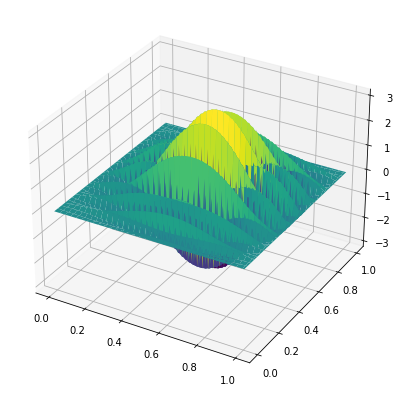

In [94]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_surface(xs,ys,fs, cmap="viridis")